In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160531)

In [3]:
mnist = input_data.read_data_sets("tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
x = tf.placeholder(tf.float32,[None,784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x,w) + w0
p = tf.nn.softmax(f)

In [5]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [6]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))

In [7]:
accuracy = tf.reduce_mean (tf.cast(correct_prediction, tf.float32))

In [9]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [11]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t:mnist.test.labels})
        print('step:%d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val) )

step:100, Loss: 7573.012695, Accuracy: 0.852900
step:200, Loss: 5357.871094, Accuracy: 0.878300
step:300, Loss: 4535.313477, Accuracy: 0.889700
step:400, Loss: 4066.229492, Accuracy: 0.898800
step:500, Loss: 3787.674316, Accuracy: 0.902800
step:600, Loss: 3585.446777, Accuracy: 0.906900
step:700, Loss: 3464.675781, Accuracy: 0.907800
step:800, Loss: 3317.243408, Accuracy: 0.911800
step:900, Loss: 3242.715820, Accuracy: 0.910400
step:1000, Loss: 3169.488525, Accuracy: 0.913900
step:1100, Loss: 3123.689941, Accuracy: 0.913400
step:1200, Loss: 3085.660645, Accuracy: 0.915400
step:1300, Loss: 3022.325439, Accuracy: 0.915800
step:1400, Loss: 2982.086426, Accuracy: 0.917700
step:1500, Loss: 2977.025391, Accuracy: 0.916800
step:1600, Loss: 2910.916504, Accuracy: 0.918600
step:1700, Loss: 2921.012695, Accuracy: 0.919100
step:1800, Loss: 2886.289795, Accuracy: 0.920400
step:1900, Loss: 2855.964111, Accuracy: 0.920100
step:2000, Loss: 2838.820557, Accuracy: 0.921700


In [13]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for(image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if(c > 6):
                break

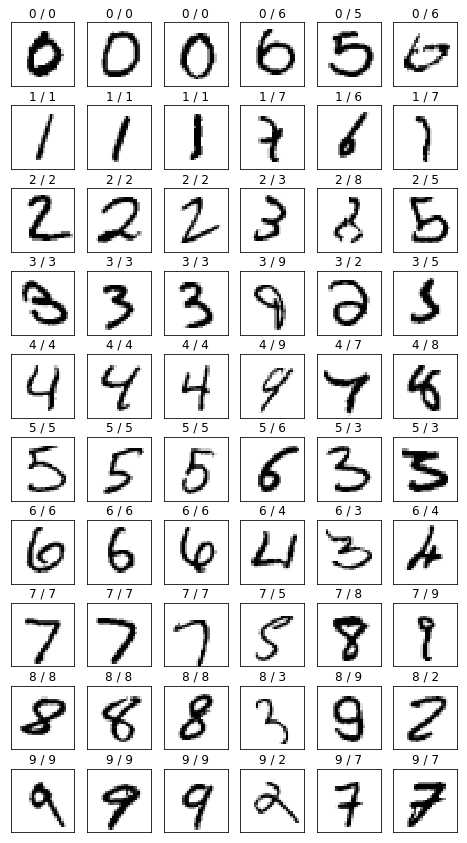

In [15]:
fig